In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/simple NLP projects/dataset/spam_massage.csv", encoding="ISO-8859-1")
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
print(df["v1"].value_counts())
df.head()

v1
ham     4825
spam     747
Name: count, dtype: int64


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()
df.isna()
df.dropna(axis=1,inplace=True)
print(df["v1"].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [4]:
def pre_text(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list

    final_text=' '.join(words)
    return final_text

print("\nOriginal tweet ->", df['v2'][12])
print("\nProcessed tweet ->", pre_text(df['v2'][12]))


Original tweet -> URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

Processed tweet -> urgent 1 week free membership 100 000 prize jackpot txt word claim 81010 c www dbuk net lccltd pobox 4403ldnw1a7rw18


In [5]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text, df['v2']))

In [6]:
print(pre_text_list)

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun', 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour', 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info', 'urgent 1 week free membership 100 

In [7]:
y = pd.get_dummies(df['v1'])
print(y)

        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_words = 10000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['v2'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
#X, tokenizer = tokenize_pad_sequences(df['v2'])
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Before Tokenization & Padding 
 urgent 1 week free membership 100 000 prize jackpot txt word claim 81010 c www dbuk net lccltd pobox 4403ldnw1a7rw18
After Tokenization & Padding 
 [ 123   27   46   12 1632  247  352   87 2512   23  152   71 2513   65
   84 2514  433 2515  582 2516    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [9]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7191 unique tokens.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3342, 100)
(3342, 2)
(1115, 100)
(1115, 2)


In [12]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_spam.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_spam.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

##Training model

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Model 1 architecture

In [17]:
from tensorflow.keras.optimizers.legacy import Adam



vocab_size = 10000
embedding_size = 64
max_len = 100

# Build model

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))


# Build the model explicitly
model.build(input_shape=(None, max_len))

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 100, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 662,946 (2.53 MB)

 Trainable params: 662,946 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

### Model 2 architecture

In [16]:
vocab_size = 10000
embedding_size = 64
max_len = 100

# Build model
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))  # ✅ Specify input_length
model2.add(LSTM(8, return_sequences=True))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.4))
model2.add(LSTM(8, return_sequences=True))
model2.add(Dropout(rate=0.4))
model2.add(LSTM(8, return_sequences=True))
model2.add(Dropout(rate=0.2))
model2.add(LSTM(8))
model2.add(Dropout(rate=0.2))
model2.add(Dense(2, activation='softmax'))  # Output layer for classification

# Build the model explicitly
model2.build(input_shape=(None, max_len))

# Print model summary
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 8)              │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 8)              │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 8)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 8)              │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 8)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 8)              │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 8)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,018 (2.46 MB)

 Trainable params: 644,002 (2.46 MB)

 Non-trainable params: 16 (64.00 B)

### save model

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'spam_massage.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)




model_filename2 = 'spam_massage2.keras'

# Combine the directory and filename
model_path2 = model_filename2

# Define the ModelCheckpoint callback
checkpoint2 = ModelCheckpoint(model_path2, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

### Compile model

In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])


# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=Adam(),
               metrics=['accuracy'])



### Training models

In [20]:
epochs=50

# Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])

print("####################### Model 2 ###################")

# Train model
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint2,early_stop])

Epoch 1/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8526 - loss: 0.4478
Epoch 1: val_loss improved from inf to 0.25367, saving model to spam_massage.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8533 - loss: 0.4439 - val_accuracy: 0.8816 - val_loss: 0.2537
Epoch 2/50
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9422 - loss: 0.1650
Epoch 2: val_loss improved from 0.25367 to 0.08631, saving model to spam_massage.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9441 - loss: 0.1614 - val_accuracy: 0.9785 - val_loss: 0.0863
Epoch 3/50
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9905 - loss: 0.0424
Epoch 3: val_loss improved from 0.08631 to 0.05692, saving model to spam_massage.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9907 - loss: 0.0415 - val_accuracy: 0.9865 - val_loss: 0.0569
Epoch 4/50
49/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9956 - loss: 0.0223
Epoch 4: val_loss improved from 0.05692 to 0.05511, savin

##Models evaluation

Model 1 accuracy report

In [23]:
from keras.models import load_model
#Load model
model = load_model(r'/content/spam_massage.keras')


# Evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))


Accuracy  : 0.9937


Model 2accuracy report

In [24]:
model2 = load_model(r'/content/spam_massage2.keras')


# Evaluate model on the test set
loss, accuracy= model2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))



Accuracy  : 0.8753


Confution metrix

Model1
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
model2
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


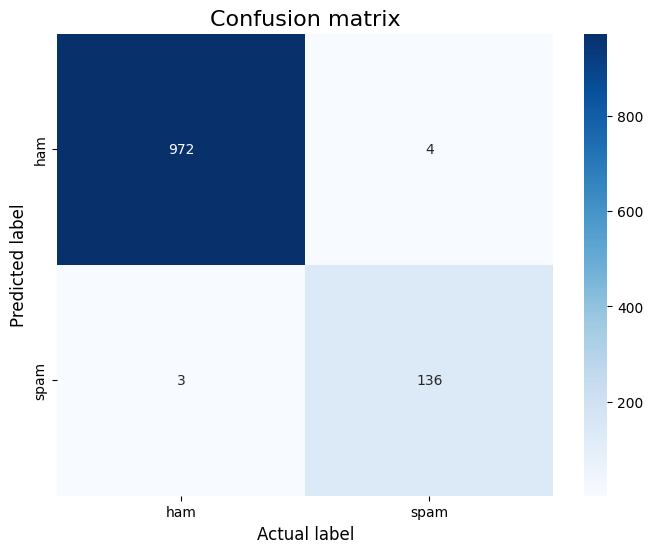

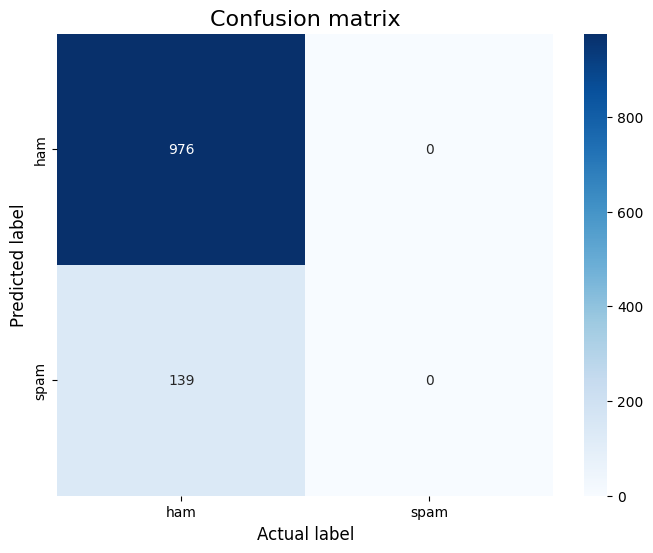

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['ham', 'spam']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
print("Model1")
plot_confusion_matrix(model, X_test, y_test)
print("model2")
plot_confusion_matrix(model2, X_test, y_test)

## Inference

In [32]:
from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['ham', 'spam']
    max_len=100
    final_text=pre_text(text)
    #print(pro_text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    #print(yt)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [33]:
predict_class("Dear Valued Customer,Congratulations! You've been exclusively selected for our incredible offers. Don't miss out on the chance to save big! Act now and enjoy jaw-dropping discounts on a wide range of products and services.From luxurious vacations to cutting-edge gadgets, we've got something for everyone. Plus, get access to our special bonus rewards program for even more savings.But hurry, these deals won't last forever! Click the link below to claim your savings before it's too late..")
predict_class("We hope this message finds you well. We're reaching out to inform you about some important updates regarding our security measures. In our ongoing commitment to ensuring the safety and privacy of our users, we've implemented additional layers of security to safeguard your information.These enhancements are designed to provide you with peace of mind and a secure experience while using our platform. Should you have any questions or concerns about these changes, please don't hesitate to reach out to our support team.Thank you for your continued trust and support.")
predict_class(df.loc[0,"v2"])
predict_class("exciting news! You have the chance to win big with our latest promotion! Simply participate in our contest for a chance to win fantastic prizes, including cash rewards, gift cards, and more. Don't miss out on this incredible opportunity!To enter the contest and increase your chances of winning, click the link below:Hurry, the contest ends soon! Good luck!")
predict_class("Urgent action is required! Your account needs immediate attention to avoid suspension. Please verify your account details by clicking the link below:Failure to verify your account may result in limited access or suspension. Don't risk losing access to your account – act now!If you have any questions or concerns, please contact our support team for assistance.Thank you for your prompt attention to this matter.")
predict_class(" i like banana biscuts")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The predicted sentiment is spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The predicted sentiment is spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The predicted sentiment is ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted sentiment is spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The predicted sentiment is spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The predicted sentiment is ham
